### Probability

Probability is defined as the chance of happening or occurrences of an event.
or
P(X) means the probability for an event X to occur.


``P(X) = (Number of outcomes favourable to Event X) / (Number of all possible outcomes)``

### Sample and Population

Population refers to the entire group of individuals for which the researcher wants to draw certain conclusions.

Sample refers to the specific group of people or individuals collected from the population and the data is collected.

### Dependent Events

Those events that are affected by the outcomes of events that had already occurred.

In other words, a dependent event can only occur if another event occurs first.



### Independent events

Independent events are those events whose occurrence is not dependent on any other event.

or 

When an event is not connected to another event



### Question 

#### Shikha has to select two students from a class of 10 girls and 15 boys. What is the probability that both students chosen are boys?





Ans: 7/20

### Question

#### Take two random dice and roll them randomly, now the probability of getting a total of 10 is calculated.

Ans: 1/12

### Conditional Probability

The conditional probability of an event A is the probability of an event ( A ), given that another event ( B ) has already occurred.

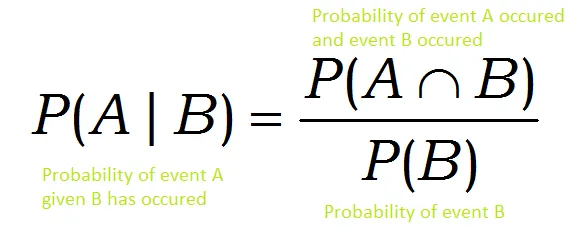

Conditional probability is a tool for quantifying dependent events.

### Example with python

Calculate the probability a student gets an A (80%+), given they miss 10 or more classes.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv(r'C:\Users\bbnei\student-mat.csv')
df.head(3)

school sex  age address famsize Pstatus  Medu  Fedu     Mjob     Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home  teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home    other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home    other  ...   

  famrel freetime  goout  Dalc  Walc health absences G1 G2  G3  
0      4        3      4     1     1      3        6  5  6   6  
1      5        3      3     1     1      3        4  5  5   6  
2      4        3      2     2     3      3       10  7  8  10  

[3 rows x 33 columns]

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

### Note:-

* We have a concerned with the columns i.e absences (number of absences), and G3 (final grade from 0 to 20).

* Create a couple new boolean columns based on these columns.

#### Add a boolean column called A noting if a student achieved 80% or higher as a final score. Original values are on a 0–20 scale so we multiply by 5.

In [3]:
df.G3

0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 395, dtype: int64

In [4]:
df['A'] = np.where(df['G3']*5 >= 80, 1, 0)

In [4]:
df["A"]

0      0
1      0
2      0
3      0
4      0
      ..
390    0
391    1
392    0
393    0
394    0
Name: A, Length: 395, dtype: int32

#### Make another boolean column called ab10 with a value of 1 if a student missed 10 or more classes.

In [5]:
df['ab10'] = np.where(df['absences'] >= 10, 1, 0)

In [6]:
df["ab10"]

0      0
1      0
2      1
3      0
4      0
      ..
390    1
391    0
392    0
393    0
394    0
Name: ab10, Length: 395, dtype: int32

In [7]:
# Add one more column to make a pivot table.

df['count'] = 1


In [8]:
cp = df[['A','ab10','count']]
cp.head()

A  ab10  count
0  0     0      1
1  0     0      1
2  0     1      1
3  0     0      1
4  0     0      1

In [9]:
# Make a pivot table to analyze the values

pd.pivot_table(
    cp, 
    values='count', 
    index=['A'], 
    columns=['ab10'], 
    aggfunc=np.sum, 
    fill_value=0
)

ab10    0   1
A            
0     277  78
1      35   5

Now we have a data on which we want to do calculation

### Calculation Part

* P(A) is the probability of a grade of 80% or greater.

* P(B) is the probability of missing 10 or more classes.

* P(A|B) is the probability of a 80%+ grade, given missing 10 or more classes.

P(A) = (35 + 5) / (35 + 5 + 277 + 78) = 0.10126582278481013
P(B) = (78 + 5) / (35 + 5 + 277 + 78) = 0.21012658227848102
P(A ∩ B) = 5 / (35 + 5 + 277 + 78) = 0.012658227848101266

And per the formula, P(A|B) = P(A ∩ B) / P(B), put it together.

P(A|B) = 0.012658227848101266/ 0.21012658227848102= 0.06